# Brain Data Preperation for Deep Learning


This notebook outlines the steps of how to unpack Electroencephalography (EEG) data into easy to work with Numpy arrays. EEG data can often be found as .mat files because Neuroscience researchers regularly use Matlab. Not everyone has access or a subscription to that platform so finding ways to port that data into Python is of importance. Sometimes that process is not as straighforward as loading in one file extension and converting it into a desired one. Here, the notebook will make it simple to converting the data into something that is ready for a deep learning modeling procedure.  


##Initialize Notebook

In [1]:
#Import needed libraries

import numpy as np
import os
from scipy.io import loadmat
import itertools

In [2]:
#If your data is already in Google Drive, then 'mount' allows you to access it directly from the cloud
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load and Unpack Data into Numpy

The steps here help in making visible the steps of loading the data and what is contained in the files. This section ends by making all the data of 4 minute length.

In [3]:
path = '/content/drive/MyDrive/EEG Data' #Defines the path of your data files ##TODO: change it to your own file directory

os.chdir(path) #Changes your directory to where your files are

files = [item for item in os.listdir(os.getcwd())] #pulls files from your directory into a list called 'files'
files.sort() #sorts the files based on their names

print('File Names', files) #see contents inside files list

eeg = [loadmat(files[i]) for i in range(len(files))] #uses loadmat to open .mat files

print(eeg[0].keys()) #see what types of data keys we have in those files per index

File Names ['1.mat', '2.mat', '3.mat', '4.mat', '5.mat']
dict_keys(['__header__', '__version__', '__globals__', 'data21', 'fs', 'subs21'])


In [4]:
#extract files' keys into list to iterate values
val_keys = [list(eeg[i].keys())[3] for i in range(len(files))]
print(val_keys)

['data21', 'data22', 'data23', 'data24', 'data25']


In [5]:
#Extract only the EEG voltage data and set into a numpy object

eeg_data = [eeg[i][val_keys[i]] for i in range(len(eeg))]
print(eeg_data[0].shape) #See the shape of your data



(125, 34795, 20)


In [6]:
# eeg_data[i].shape denotes [Channels, Samples, Participants]
# len(eeg_data) denotes number of songs

participants = 20
# 125 Hz * 4 mins * 60 secs = Total Num Samples
stop = 125*4*60

X4min = []

for i in range(len(eeg_data)):
  x = np.transpose(eeg_data[i])

  for j in range(0,20):
    # make all matrices 4 min in length
    X4min.append(x[j][0:stop])

X4min = np.array(X4min)
print(X4min.shape)


(100, 30000, 125)


##Organize Data

Once the data is extracted into numpy arrays, we must organize the data into Train, Validation, and Test sets. This is important to have a training procedure that can generalize across time and is balanced across participants. Lastly, the sets are split into 1 second examples for higher resolution of inference.

In [7]:
#sampling rate
sr = 125
#num samples in 15 seconds
samp = sr*15

#Minute 1
chunk1 = [X4min[i][0:samp] for i in range(len(X4min))]
chunk2 = [X4min[i][samp:samp*2] for i in range(len(X4min))]
chunk3 = [X4min[i][samp*2:samp*3] for i in range(len(X4min))]
chunk4 = [X4min[i][samp*3:samp*4] for i in range(len(X4min))]

#Minute2
chunk5 = [X4min[i][samp*4:samp*5] for i in range(len(X4min))]
chunk6 = [X4min[i][samp*5:samp*6] for i in range(len(X4min))]
chunk7 = [X4min[i][samp*6:samp*7] for i in range(len(X4min))]
chunk8 = [X4min[i][samp*7:samp*8] for i in range(len(X4min))]

#Minute3
chunk9 = [X4min[i][samp*8:samp*9] for i in range(len(X4min))]
chunk10 = [X4min[i][samp*9:samp*10] for i in range(len(X4min))]
chunk11 = [X4min[i][samp*10:samp*11] for i in range(len(X4min))]
chunk12 = [X4min[i][samp*11:samp*12] for i in range(len(X4min))]

#Minute4
chunk13 = [X4min[i][samp*12:samp*13] for i in range(len(X4min))]
chunk14 = [X4min[i][samp*13:samp*14] for i in range(len(X4min))]
chunk15 = [X4min[i][samp*14:samp*15] for i in range(len(X4min))]
chunk16 = [X4min[i][samp*15:samp*16] for i in range(len(X4min))]

In [8]:
#Use chunks to balance across time and create Train, Validation, and Test sets

X_train = [chunk1]+[chunk5]+[chunk9]+[chunk13]+[chunk4]+[chunk8]+[chunk12]+[chunk16]
X_train = np.array(X_train)
X_train = np.concatenate(X_train)
print(X_train.shape)



X_val = [chunk2]+[chunk6]+[chunk10]+[chunk14]
X_val = np.array(X_val)
X_val = np.concatenate(X_val)
print(X_val.shape)



X_test = [chunk3]+[chunk7]+[chunk11]+[chunk15]
X_test = np.array(X_test)
X_test = np.concatenate(X_test)
print(X_test.shape)

(800, 1875, 125)
(400, 1875, 125)
(400, 1875, 125)


In [9]:
#Split 15 second chunk data into 1 second examples
chunk_sec = 15 #
blen = int(X_train.shape[1]/chunk_sec)

X_trainb = []
for i in range(len(X_train)):
    batch = np.array(np.split(X_train[i],chunk_sec))
    X_trainb.append(batch)

X_train = np.array(X_trainb)
X_trainb = []
X_train = np.reshape(X_train,(len(X_train)*chunk_sec,blen,125,1))
print(X_train.shape)

X_valb = []
for i in range(len(X_val)):
    batch = np.array(np.split(X_val[i],chunk_sec))
    X_valb.append(batch)

X_val = np.array(X_valb)
X_valb = []
X_val = np.reshape(X_val,(len(X_val)*chunk_sec,blen,125,1))
print(X_val.shape)

X_testb = []
for i in range(len(X_test)):
    batch = np.array(np.split(X_test[i],chunk_sec))
    X_testb.append(batch)

X_test = np.array(X_testb)
X_testb = []
X_test = np.reshape(X_test,(len(X_test)*chunk_sec,blen,125,1))
print(X_test.shape)

(12000, 125, 125, 1)
(6000, 125, 125, 1)
(6000, 125, 125, 1)


##Plot Data

In [ ]:
x = X4min[4] #Select one channel of EEG data

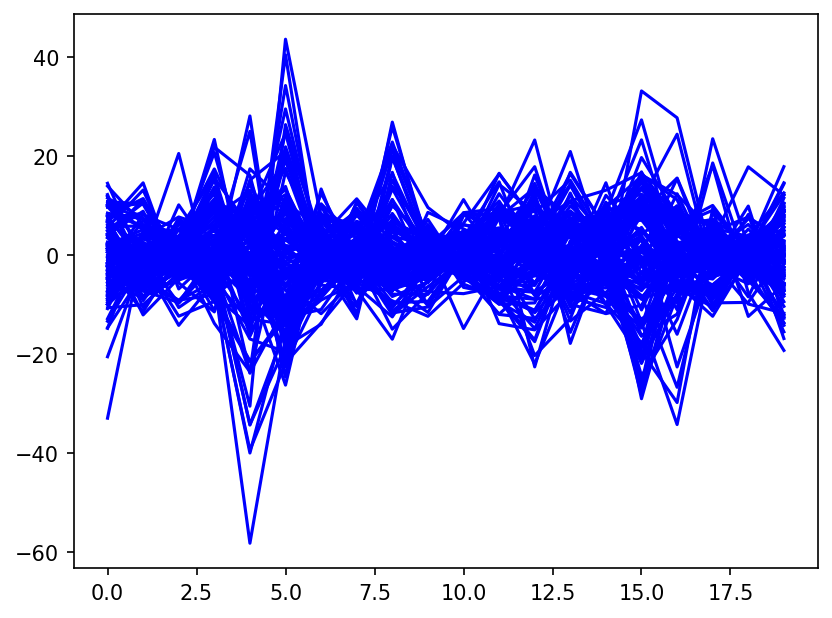

In [10]:
import matplotlib.pyplot as plt
#Plot Time Series of one EEG Channel
fig, ax = plt.subplots(dpi=150)
plt.plot(x[0:7500,0], color='blue')
plt.show()

In [11]:
#Install aesthetic plotting package
!pip install vapeplot

  Preparing metadata (setup.py) ... done
  Created wheel for vapeplot: filename=vapeplot-0.0.8-py3-none-any.whl size=11015 sha256=7665b2925ec73da0775574bde019ff5548a8eb3d94ecc6064091730a472824f5
  Stored in directory: /root/.cache/pip/wheels/ef/32/00/c223926a70443167f5c955c1dccc4ecaa37c65bd6deb64dfff
Successfully built vapeplot


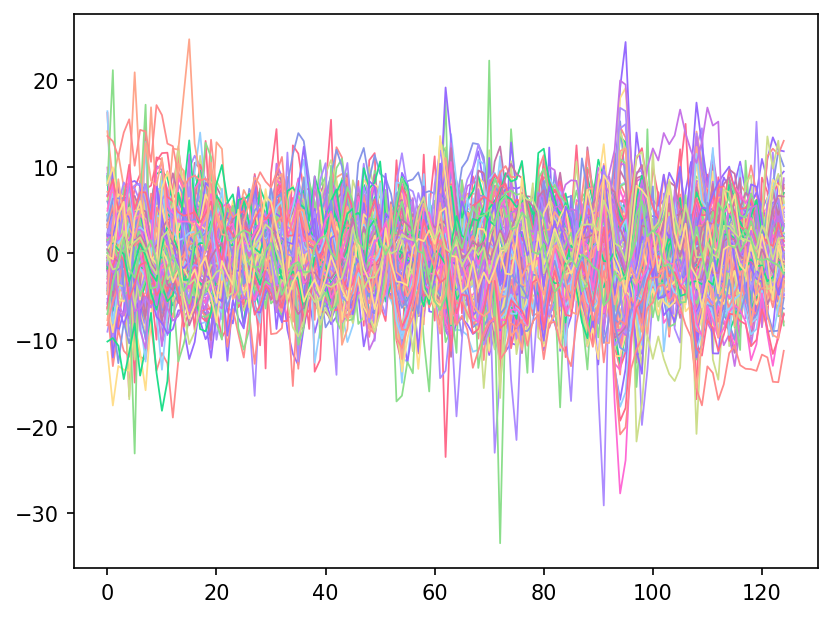

In [12]:

import vapeplot

p = 'vaporwave' #Pick the aesthetic colormap of your choosing

vapeplot.set_palette(p) #Set the color palette

#Plot All Channels of EEG for 1 Second
x = np.reshape(X_train[10], (125,125))
plt.figure(dpi=150)
plt.plot(x, linewidth=.85)
plt.show()

Text(0.5, 0, 'Samples')

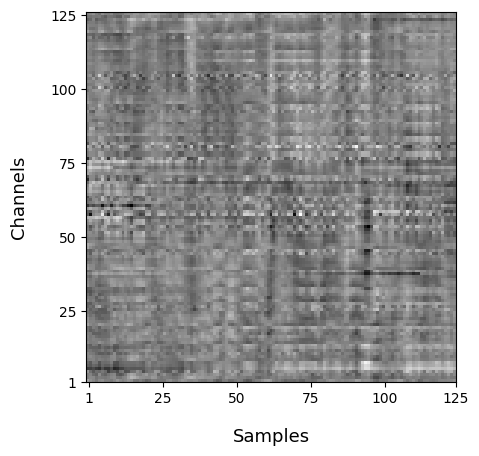

In [13]:
#Plot Greyscale Image Version of 1 Second of all Channels
font = {'family': 'Verdana',
        'color':  'black',
        'size': 13,
        }

cmap = vapeplot.cmap('vaporwave')

x2 = x.T

x3 = x2.repeat(10, axis=0).repeat(10, axis=1)

plt.yticks([0.5,25.5,50.5,75.5,100.5,124.5],['125','100','75','50','25','1'])
plt.xticks([0.5,25.5,50.5,75.5,100.5,124.5],['1','25','50','75','100','125'])
image = plt.imshow(x2, cmap='Greys',interpolation='nearest')
plt.ylabel('Channels', fontdict=font, labelpad=16)
plt.xlabel('Samples', fontdict=font, labelpad=16)